In [14]:
import os

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)

BASE_DIR = "../../../"
RESULTS_DIR = os.path.join(BASE_DIR, "results")

In [15]:
val_splits = [
    0.01,
    0.025,
    0.05,
    0.075,
    0.1,
    0.15,
    0.2,
    0.3,
    0.4,
    0.5,
]
all_results = []
for vs in val_splits:
    df = pd.read_csv( os.path.join(RESULTS_DIR, f"results_ablation_vs={vs}.csv") )
    df['Val_Split'] = vs
    all_results.append(df)

In [16]:
df_results = pd.concat(all_results)

In [17]:
df_results.head()

,Dataset,Seed,Model_Type,Metric,Val,Hyper_Val,Test,Extra,Val_Split
0,adience_ablation,15,fweg,Accuracy,0.789474,0.75,0.779116,"{""groups"": 1, ""groups_descr"": ""no groups"", ""ad...",0.01
1,adience_ablation,15,fweg,Accuracy,0.789474,0.75,0.779116,"{""groups"": 1, ""groups_descr"": ""no groups"", ""ad...",0.01
2,adience_ablation,15,fweg,Accuracy,0.789474,0.75,0.779116,"{""groups"": 1, ""groups_descr"": ""no groups"", ""ad...",0.01
3,adience_ablation,15,fweg,Accuracy,0.842105,0.70,0.777108,"{""groups"": 2, ""groups_descr"": ""gender groups"",...",0.01
4,adience_ablation,15,fweg,Accuracy,0.842105,0.70,0.777108,"{""groups"": 2, ""groups_descr"": ""gender groups"",...",0.01


In [18]:
df_baselines = df_results[ df_results['Model_Type'] != 'fweg' ]
df_fweg = df_results[ df_results['Model_Type'] == 'fweg' ]

In [19]:
# separate out FWEG that ran knowing the true form the metric and FWEG that
# ran against a black-box evaluation of the metric
known_metric = df_fweg['Extra'].apply(lambda x: '"FW_val_flag": true' in x)
df_fweg['Model_Type'].loc[known_metric] = 'fweg_known_metric'
df_fweg['Model_Type'].loc[~known_metric] = 'fweg_unknown_metric'

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jupyter/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyter/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
t = df_fweg[['Seed', 'Model_Type', 'Val_Split', 'Extra']]
d = t.drop_duplicates()
assert t.shape == d.shape

t = df_baselines[['Seed', 'Model_Type', 'Val_Split']]
d = t.drop_duplicates()
assert t.shape == d.shape

In [21]:
# baselines we can group on all columns but the seed, then perform aggregation
groups_baselines = df_baselines.groupby(['Dataset', 'Model_Type', 'Metric', 'Val_Split'])
# fweg we need to group by seed first to extract the hyperparameters that performed best
groups_fweg = df_fweg.groupby(['Model_Type', 'Dataset', 'Metric', 'Seed', 'Val_Split'])

In [22]:
def get_best_fweg(df):
    best = df['Hyper_Val'].idxmax()
    return df.loc[best]

In [23]:
df_best_fweg = groups_fweg.apply(get_best_fweg)
df_best_fweg.reset_index(drop=True, inplace=True)
df_best_fweg.sort_values(['Model_Type', 'Seed', 'Metric', 'Val_Split'])

,Dataset,Seed,Model_Type,Metric,Val,Hyper_Val,Test,Extra,Val_Split
0,adience_ablation,15,fweg_unknown_metric,Accuracy,0.789474,0.750000,0.779116,"{""groups"": 1, ""groups_descr"": ""no groups"", ""ad...",0.010
1,adience_ablation,15,fweg_unknown_metric,Accuracy,0.877551,0.840000,0.827309,"{""groups"": 6, ""groups_descr"": ""gender and age ...",0.025
2,adience_ablation,15,fweg_unknown_metric,Accuracy,0.877441,0.834667,0.827610,"{""groups"": 2, ""groups_descr"": ""gender groups"",...",0.050
3,adience_ablation,15,fweg_unknown_metric,Accuracy,0.852349,0.859060,0.836345,"{""groups"": 6, ""groups_descr"": ""gender and age ...",0.075
4,adience_ablation,15,fweg_unknown_metric,Accuracy,0.845003,0.871133,0.837004,"{""groups"": 2, ""groups_descr"": ""gender groups"",...",0.100
5,adience_ablation,15,fweg_unknown_metric,Accuracy,0.857186,0.825974,0.858855,"{""groups"": 2, ""groups_descr"": ""gender groups"",...",0.150
6,adience_ablation,15,fweg_unknown_metric,Accuracy,0.816583,0.841709,0.832329,"{""groups"": 2, ""groups_descr"": ""gender groups"",...",0.200
7,adience_ablation,15,fweg_unknown_metric,Accuracy,0.826886,0.841100,0.831591,"{""groups"": 2, ""groups_descr"": ""gender groups"",...",0.300
8,adience_ablation,15,fweg_unknown_metric,Accuracy,0.865578,0.824341,0.836345,"{""groups"": 6, ""groups_descr"": ""gender and age ...",0.400
9,adience_ablation,15,fweg_unknown_metric,Accuracy,0.823293,0.836345,0.810241,"{""groups"": 2, ""groups_descr"": ""gender groups"",...",0.500


In [24]:
fweg_res = df_best_fweg.groupby(['Dataset', 'Model_Type', 'Metric', 'Val_Split']).mean()
fweg_res

Seed       Val  \
Dataset          Model_Type          Metric   Val_Split                   
adience_ablation fweg_unknown_metric Accuracy 0.010        35  0.817544   
                                              0.025        35  0.856871   
                                              0.050        35  0.840038   
                                              0.075        35  0.809389   
                                              0.100        35  0.851386   
                                              0.150        35  0.841132   
                                              0.200        35  0.828141   
                                              0.300        35  0.835305   
                                              0.400        35  0.846106   
                                              0.500        35  0.844447   

                                                         Hyper_Val      Test  
Dataset          Model_Type          Metric   Val_Split                       
adience_ablation fweg_unknown_metric Accuracy 0.010       0.826667  0.704585  
                                              0.025       0.818400  0.765535  
                                              0.050       0.807790  0.800655  
                                              0.075       0.837557  0.813122  
                                              0.100       0.830498  0.824531  
                                              0.150       0.846417  0.829358  
                                              0.200       0.835176  0.821787  
                                              0.300       0.845790  0.825328  
                                              0.400       0.839364  0.832219  
                                              0.500       0.836745  0.826605

In [25]:
baselines_res = groups_baselines.mean()
baselines_res

Seed       Val  Hyper_Val  \
Dataset          Model_Type Metric   Val_Split                              
adience_ablation base       Accuracy 0.010        35  0.726316   0.760000   
                                     0.025        35  0.755102   0.752000   
                                     0.050        35  0.767677   0.762000   
                                     0.075        35  0.754362   0.757047   
                                     0.100        35  0.748744   0.758794   
                                     0.150        35  0.752349   0.759866   
                                     0.200        35  0.746231   0.762814   
                                     0.300        35  0.750084   0.770569   
                                     0.400        35  0.763317   0.762610   
                                     0.500        35  0.763052   0.755422   
                 ft         Accuracy 0.010        35  0.757895   0.790000   
                                     0.025        35  0.828571   0.760000   
                                     0.050        35  0.791919   0.776000   
                                     0.075        35  0.783893   0.775839   
                                     0.100        35  0.815075   0.774874   
                                     0.150        35  0.827517   0.768562   
                                     0.200        35  0.836683   0.782412   
                                     0.300        35  0.838191   0.804682   
                                     0.400        35  0.857035   0.790213   
                                     0.500        35  0.848594   0.801606   

                                                    Test  
Dataset          Model_Type Metric   Val_Split            
adience_ablation base       Accuracy 0.010      0.760341  
                                     0.025      0.760341  
                                     0.050      0.760341  
                                     0.075      0.760341  
                                     0.100      0.760341  
                                     0.150      0.760341  
                                     0.200      0.760341  
                                     0.300      0.760341  
                                     0.400      0.760341  
                                     0.500      0.760341  
                 ft         Accuracy 0.010      0.761446  
                                     0.025      0.763855  
                                     0.050      0.762149  
                                     0.075      0.765763  
                                     0.100      0.764659  
                                     0.150      0.771486  
                                     0.200      0.779317  
                                     0.300      0.790361  
                                     0.400      0.791968  
                                     0.500      0.800803

In [26]:
def plot_metric(dfs, metric):
    x = None
    ys = []
    ys_descrp = []
    for df in dfs:
        model_types = df.index.unique(level=1)
        assert model_types.name == "Model_Type"
        for mt in model_types:
            scores = df.loc[('adience_ablation', mt, metric)]
            assert scores.index.name == "Val_Split"
            y = scores['Test'].values
            if x is None:
                x = scores.index.values
            else:
                # make sure index is the same
                assert (scores.index.values == x).all()
            ys.append(y)
            ys_descrp.append(mt)
            
    for y, y_descrp in zip(ys, ys_descrp):
        plt.plot(x, y, label=y_descrp)
    plt.legend()

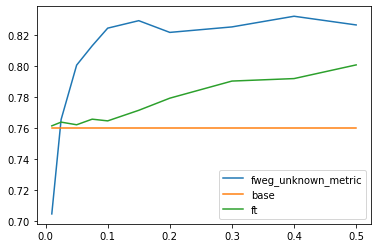

In [28]:
plot_metric([fweg_res, baselines_res], "Accuracy")

In [31]:
# # dump all results
# pd.concat([df_baselines,df_best_fweg]).sort_values(["Dataset", "Seed", "Model_Type",'Val_Split']).to_csv(
#     "../compiled_adience_ablation.csv",
#     index=False
# )
